In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.info()# Data type of feature and target is correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.describe()# iqr for Chirps/Sec = 1.70 ll= q1 -1.5*iqr=>15.45-2.55-->12.9> min> ll ul=q3+1.5iqr= 17.15+2.55=19.7, max is near to it
#For Ground temperature iqr=10 ll= 73.4-15= 58.4  min(69.4)> ll(58.4), ul=83.4+15 =98.4 > max, so no outliers in Ground Temp

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.isnull().sum()# No NULL Values

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
#Find the linear regression equation for this data.
print(df.corr())
X=df['Ground Temperature'].values
y=df['Chirps/Second'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#print(X_train.shape, X_test.shape)
model.fit(X_train.reshape(-1, 1),y_train)
y_pred=model.predict(X_test.reshape(-1, 1))
y_pred
#print(model.score(X_test.reshape(-1, 1),y_test))
print("y=",model.coef_,"x+",model.intercept_)




                    Chirps/Second  Ground Temperature
Chirps/Second            1.000000            0.832042
Ground Temperature       0.832042            1.000000
y= [0.20712189] x+ 0.07232149389253806


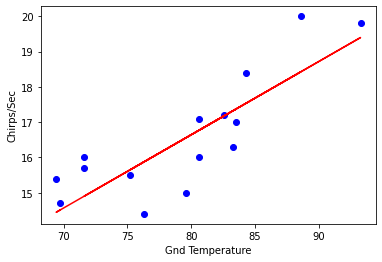

In [ ]:
#Chart the original data and the equation on the chart.
import matplotlib.pyplot as plt
plt.scatter(X,y,color='b')
plt.plot(X_train.reshape(-1, 1),model.predict(X_train.reshape(-1, 1)),color='r')
plt.xlabel("Gnd Temperature")
plt.ylabel("Chirps/Sec")
plt.show()

In [ ]:
#Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print(model.score(X_test.reshape(-1, 1),y_test))
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

0.548879380012409
R2- SCORE: 0.548879380012409


In [ ]:
#Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

print(model.predict([[95]])) 

[19.7489006]


In [ ]:
#Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?



# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df_2 = pd.read_fwf("brain_body.txt")

FileNotFoundError: ignored

In [ ]:
df_2.info()

In [ ]:
df_2.describe()

In [ ]:
df_2.isnull().sum()# No Null values

In [ ]:
#Outlier Detection And Removal For Body Wt Feature
print(df_2.shape)
q1=df_2['Body'].quantile(0.25)
q3=df_2['Body'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("lower limit",ll,"Upper limit",ul)
df_2=df_2[~((df_2['Body']<ll) | (df_2['Body']>ul))]
print(df_2.shape)



In [ ]:
print(df_2.corr())
X=df_2['Body'].values
y=df_2['Brain'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#print(X_train.shape, X_test.shape)
model.fit(X_train.reshape(-1, 1),y_train)
y_pred=model.predict(X_test.reshape(-1, 1))
y_pred
#print(model.score(X_test.reshape(-1, 1),y_test))
print("y=",model.coef_,"x+",model.intercept_)

In [ ]:
#Chart the original data and the equation on the chart.
import matplotlib.pyplot as plt
plt.scatter(X,y,color='b')# Most of the sample is concentrated <1000 unit of wts
plt.plot(X_train.reshape(-1, 1),model.predict(X_train.reshape(-1, 1)),color='r')
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.show()

In [ ]:
#Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print(model.score(X_test.reshape(-1, 1),y_test))
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Score With No Outlier removal

R2-score: -4.563584259374876

With only outliers in feature removed, 

**R2 score is 0.9**

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df_3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df_3.info()
df_3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df_3.isnull().sum()# No Null values

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
print(df_3.shape)
#Outlier detection for rank Column
q1=df_3['Rank'].quantile(0.25)
q3=df_3['Rank'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("lower limit",ll,"Upper limit",ul)
df_3=df_3[~((df_3['Rank']<ll) | (df_3['Rank']>ul))]
print(df_3.shape)

(52, 6)
2.0
lower limit -2.0 Upper limit 6.0
(52, 6)


In [ ]:
print(df_3.shape)
#Outlier detection for Year Column
q1=df_3['Year'].quantile(0.25)
q3=df_3['Year'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("lower limit",ll,"Upper limit",ul)
df_3=df_3[~((df_3['Year']<ll) | (df_3['Year']>ul))]
print(df_3.shape)

(52, 6)
8.0
lower limit -9.0 Upper limit 23.0
(51, 6)


In [ ]:
print(df_3.corr())
X=df_3.iloc[:,:5].values
print(X.shape)
y=df_3['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#print(X_train.shape, X_test.shape)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred
print(model.score(X_test,y_test))



             Sex      Rank      Year    Degree     YSdeg    Salary
Sex     1.000000 -0.220557 -0.383382  0.086533 -0.068712 -0.239125
Rank   -0.220557  1.000000  0.495556 -0.031178  0.686670  0.870674
Year   -0.383382  0.495556  1.000000 -0.212945  0.604651  0.664026
Degree  0.086533 -0.031178 -0.212945  1.000000 -0.530534 -0.105675
YSdeg  -0.068712  0.686670  0.604651 -0.530534  1.000000  0.647787
Salary -0.239125  0.870674  0.664026 -0.105675  0.647787  1.000000
(51, 5)
0.8224457453501537


In [ ]:
#Find the linear regression equation for this data using columns 1-5 to column 6.

print("y=",model.coef_[0],"x1 +",model.coef_[1],"x2 +",model.coef_[2],"x3 +",model.coef_[3],"x4 +",model.coef_[4],"x5 +",model.intercept_)

y= 1308.0948115220424 x1 + 5166.328367170354 x2 + 381.39900463758295 x3 + -164.08093431221465 x4 + -40.516901038206925 x5 + 10607.852331252105


In [ ]:
#Find the selection of columns with the best  R2  score.
print(model.coef_)


[1308.09481152 5166.32836717  381.39900464 -164.08093431  -40.51690104]


In [ ]:
# Based on coefficients, we can say that Rank is the predominant column, remaining columns 
# are not predominant, trying with Rank only R2 is 72%
X=df_3['Rank'].values
print(X.shape)
y=df_3['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#print(X_train.shape, X_test.shape)
model.fit(X_train.reshape(-1, 1),y_train)
y_pred=model.predict(X_test.reshape(-1, 1))
y_pred
print(model.score(X_test.reshape(-1, 1),y_test))

(51,)
0.7242141319234972


In [ ]:
#Tried with 3 features with highest weightage# Score is 0.68, On removing one outlier
# In Year Column R2 improves to 0.8, significant improvement
X=df_3[['Rank','Sex',"Year"]].values
print(X.shape)
y=df_3['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#print(X_train.shape, X_test.shape)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred
print(model.score(X_test,y_test))

(51, 3)
0.8039470311495354


In [ ]:
#Report whether sex is a factor in salary
# its correlation to target is <-0.2
#Dropping Sex column and calculating score, perf nearly same, so no effect 
X=df_3.iloc[:,1:5].values
print(X.shape)
y=df_3['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#print(X_train.shape, X_test.shape)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred
print(model.score(X_test,y_test))


(51, 4)
0.8181159439436407
